## Resumo

- Foram feitas análises para entender como o mercado de trabalho em dados se apresenta no quesito diversidade, abordando as dimensões de gênero, raça/cor e deficiência.
- Mulheres, pessoas negras (pretas/pardas) e pessoas com deficiência (PCD) são menos da metade dos respondentes - A proporcionalidade brasileira não se reflete no mercado de trabalho.
- Pessoas em algum grupo de diversidade são as que tem menores salários e estão em cargos de menor senioridade (o já conhecido efeito tesoura), principalmente mulheres negras e PCD's.
- Ao final do texto, são apresentados os principais desafios observados para atingir a diversidade e dicas de conteúdo sobre o tema.


## Os desafios para a diversidade: estamos trabalhando num ambiente diverso?



Desde 2019 a comunidade Data Hackers organiza a coleta e divulgação de dados sobre o mercado de trabalho no mundo de dados: o *State of Data Brazil*. Uma das [análises premiadas](https://www.kaggle.com/code/hayalacavenague/existe-desigualdade-de-g-nero-em-dados?kernelSessionId=100683091) no desafio promovido em 2022 destacou as principais desigualdades que esse mercado tem quando comparamos homens e mulheres. Porém, sabemos que não é apenas o sexo biológico que impõe obstáculos na evolução de carreira de profissionais. Ainda hoje, outras características como: cor/etnia, orientação sexual, identidate de gênero e preseça de alguma deficiência também podem ser determinantes no sucesso profissional.

Muitas perguntas ainda ficaram aberto na última pesquisa *State of Data Brazil*, entre elas: Qual é o panorama da diversidade em dados se observarmos além do gênero? Estamos vivendo num ambiente diverso? O Brasil é representado aqui?

A boa notícia é que a pesquisa mais recente aumentou seu escopo, trazendo mais informações de tais características de diversidade dos profissionais **e é disso que vamos falar nessa análise**.


## Diversidade pra quê?!

<img align="right" src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExczhscnM4cWZoeXhiMXA4bHN1aGRxdWZxdTNsdnA1cDQ2MGJybnhudCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/K5dif1OKX95lK/giphy.gif" width="300" height="300"  /> 

A busca por diversidade nos ambientes e igualdade de direitos não é novidade e não é exclusividade do mundo corporativo. A copa do mundo feminina de futebol é um bom exemplo disso, trazendo a tona muitas questões sobre diferenças salariais, de patrocínio e premiação quando comparamos homens e mulheres. Essa discussão também existe no ambiente do cinema, onde corpos fora do padrão são menos valorizados e recebem menos oportunidades, como destacado por Viola Davis em sua autobiografia. Assim como no cinema, onde pessoas negras são frequentemente elencadas para um mesmo tipo de personagem, no ambiente profissional, vemos que algumas profissões são muito comuns para pessoas negras e mulheres, enquanto outras parecem inalcaçáveis para esses mesmos grupos.


Além de ser importante para os indivíduos, podendo trazer uma condição mais igualitária e de justiça social, incluir pessoas com diferentes experiências e visões de mundo pode se traduzir em benefícios para as empresas. Um [estudo](https://simaigualdaderacial.com.br/en/wp-content/uploads/2023/01/Relatorio_AcoesAfirmativasrevisado.docx.pdf) realizado pelo Instituto Identidades Brasil, o ID_BR, mostrou que:


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:10px 0;">
<b>Aumentos na ordem de 10% na diversidade étnico-racial e de gênero nas empresas estimularam incrementos de 4 a 5% na produtividade</b></div>



<p>&nbsp;</p>


Além da produtividade, existem estudos que demonstram aumento da <b>performance financeira</b> das empresas, como descrito nesse material da [Mckinsey](https://www.mckinsey.com/capabilities/people-and-organizational-performance/our-insights/delivering-through-diversity/pt-BR).


Considerando esse contexto, a análise apresentada aqui utiliza os dados da pesquisa *State of data Brazil* coletados em 2022 com o objetivo de avaliar: 

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:10px 0;">
<b>Qual o panorama da diversidade em que os profissionais de dados estão inseridos?!</b></div>



## Informações importantes da análise

- Considerando o objetivo de analisar o panorama da diversidade na empresas, nesta análise foram excluídos profissionais desempregados ou estudantes.
- As comparações apresentadas consideram **5 grupos**: homens brancos, homens negros (pardos/pretos), mulheres brancas, mulheres negras e pessoas com deficiência (independente de gênero ou cor).
- Para algumas análises, apresentamos também uma visão binária: "Faz parte de algum dos grupos de diversidade" (Sim ou Não). Em que qualquer pessoa que seja mulher, negra ou tenha deficiência é englobado como "sim".


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

#lendo dados
df_base = pd.read_csv('/kaggle/input/state-of-data-2022/State_of_data_2022.csv', low_memory=False)

#Com o objetivo de simplificar os nomes das colunas do banco de dados 
#foi criada a função que retorna o texto entre duas aspas:

def extract_text_between_quotes(string):
    pattern = r"'(.*?)'"
    matches = re.findall(pattern, string)
    return matches

# Por exemplo, ao aplicar a função extract_text_between_quotes na primeira coluna o retorno é o seguinte:
# ['P0', 'id']
# Como o interesse era utilizar apenas a segunda parte (id), 
# foi feito um for para todas as colunas do banco, guardando apenas o indice [1]:

df_base.columns = [extract_text_between_quotes(column_name)[1] for column_name in list(df_base.columns)]

# criando colunas de interesse:

df_base["Cor_bin"] = df_base["Cor/raca/etnia"] \
          .replace({'Branca': 'Não Negro', 
                    'Amarela': 'Não Negro',
                    'Parda': 'Negro',
                    'Preta': 'Negro',
                    'Prefiro não informar': 'Excluir', 
                    'Outra': 'Excluir',
                    'Indígena': 'Excluir'})

condicoes = [(df_base['Genero']=='Masculino') & (df_base['Cor_bin']=='Não Negro')  & (df_base['PCD']=='Não') ,
             (df_base['Genero']=='Masculino') & (df_base['Cor_bin']=='Negro')      & (df_base['PCD']=='Não') ,
             (df_base['Genero']=='Feminino')  & (df_base['Cor_bin']=='Não Negro')  & (df_base['PCD']=='Não'), 
             (df_base['Genero']=='Feminino')  & (df_base['Cor_bin']=='Negro')      & (df_base['PCD']=='Não') ,
             (df_base['PCD']=='Sim')
             ]

output = ['Homem branco',
         'Homem negro',
         'Mulher branca',
         'Mulher negra',
         'PCD']

df_base['grupos_diversidade'] = np.select(condicoes,output, 'outros')

condicoes = [(df_base['Genero']=='Feminino')| (df_base['Cor_bin']=='Negro')| (df_base['PCD']=='Sim') ]
output = ['Sim']
df_base['diversidade_bin'] = np.select(condicoes,output, 'Não')

#removendo profisionais desempregrados, estudantes e pessoas que não informaram a situação do trabalho

df = df_base.loc[(df_base['Qual sua situação atual de trabalho?']!='Desempregado, buscando recolocação')
                 &(df_base['Qual sua situação atual de trabalho?']!='Desempregado e não estou buscando recolocação')
                 &(df_base['Qual sua situação atual de trabalho?']!='Somente Estudante (pós-graduação)')
                 &(df_base['Qual sua situação atual de trabalho?']!='Somente Estudante (graduação)')
                 &(df_base['Qual sua situação atual de trabalho?']!='Prefiro não informar')
                 &(df_base['grupos_diversidade']!='outros')]

from wordcloud import WordCloud

## Qual é a cara do profissional de dados?

O gráfico abaixo representa proporcionalmente como os grupos de interesse se distribuem entre os respondentes da pesquisa e já nos deixa claro que: a distribuição entres esses grupos não é igualitária. **Mulheres negras e pessoas com deficiência** são as pessoas com **menor representatividade numérica**.

Somando os percentuais de mulheres (brancas e negras), homens negros e PCD's, vemos que:

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:10px 0;">
<b>Apenas 47,72% dos profissionais estão em algum dos grupos de diversidades avaliados. </b></div>



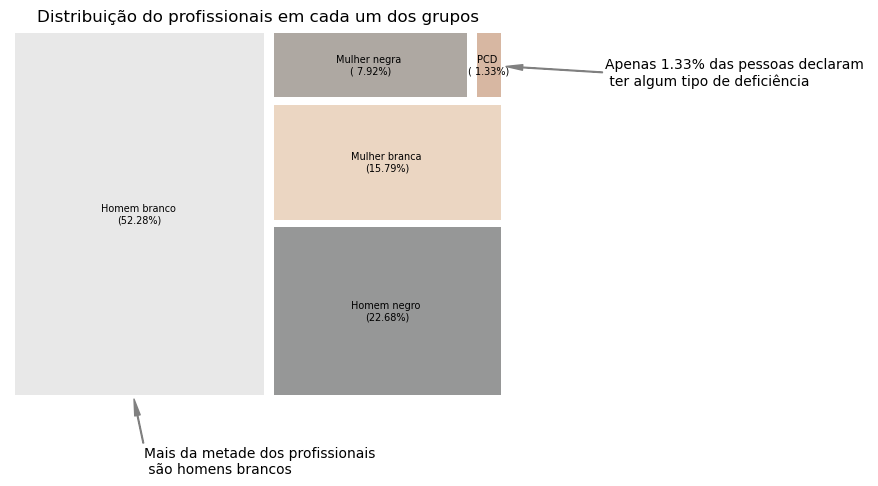

In [2]:
#Montando gráfico "treemap"

## padronizando cores
cor_homem_branco= 'lightgrey'
cor_homem_negro= '#2e3130'
cor_mulher_branca= '#d8af87'
cor_mulher_negra= '#5f5246'
cor_pcd= '#b17146'
cor_grupo_diversidade = '#60412C'

#construindo tabela que traz as contagems de pessoas em cada grupo de diversdade
tabela_grupos = pd.DataFrame(df.loc[df.grupos_diversidade!='outros','grupos_diversidade'].value_counts())

#removendo indice da tabela acima
tabela_grupos.reset_index(inplace=True)

#renomeando colunas
tabela_grupos.rename(columns={'index':'nome_grupo','grupos_diversidade':'contagem'},inplace=True)

# criando rotulos  do gŕafico:
# gerando uma lista com os percentuais de cada grupo
perc = [str('{:5.2f}'.format(i/tabela_grupos['contagem'].sum()*100)) + "%" for i in tabela_grupos['contagem']]

# concatenando nome do gripo e percentual para criar o rotulo que aparece no gráfico
rotulos = [f'{i[0]} \n({i[1]})' for i in zip(tabela_grupos['nome_grupo'], perc)]
cores_fundo = [cor_homem_branco, cor_homem_negro, cor_mulher_branca, cor_mulher_negra, cor_pcd]
#cores_rotulos = [cor_homem_branco, cor_homem_negro, cor_mulher_branca, cor_mulher_negra, cor_pcd]
#cores_textos = [cor_texto_homem_branco, cor_texto_homem_negro, cor_texto_mulher_branca, cor_texto_mulher_negra, cor_texto_pcd]

# plotando 
squarify.plot(sizes=tabela_grupos['contagem'], label=rotulos, alpha=0.5,
              color=cores_fundo, pad=1, text_kwargs={'fontsize':7} )
plt.axis('off')

plt.title(f"Distribuição do profissionais em cada um dos grupos")

#adicionando observações de destaque (anotações) ao graficos
plt.annotate(f'Apenas{perc[4]} das pessoas declaram \n ter algum tipo de deficiência', 
             xy=(100, 90), xytext=(120, 85),
            arrowprops=dict(color='gray',width=0.5,headwidth=4),
            )
plt.annotate('Mais da metade dos profissionais \n são homens brancos', 
             xy=(25, 0), xytext=(27, -20),
            arrowprops=dict(color='gray',width=0.5,headwidth=4),
            )

plt.show()



## A diversidade brasileira é bem representada no mercado de trabalho?!

A discrepância nas proporções observadas acima fica mais evidente quando fazemos uma comparação com dados oficiais do IBGE. O gráfico abaixa nos auxilia nessa comparação mostrando as proporções no Brasil segundo os dados mais recentes e as proporções na pesquisa State of Data 2022. Fica claro a sub-representação de mulheres, pessoas negras e pessoas com deficiência. Ou seja: ainda que mulheres e pessoas negras sejam mais da metade da população brasileira, não representam mais do que um terço dos profisssionais de dados. A sub-representação de pessoas com deficiência é ainda maior: são 6,7% no Brasil contra 1,33% entre os profissionais de dados.

In [3]:
#dados Brasil
mulheres_br= 51.1
#homens_br = 100 - mulheres_br
pcd_br = 6.7
negros_br = 45.3 + 10.6
#fonte:
#https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/20551-pessoas-com-deficiencia.html
#https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18320-quantidade-de-homens-e-mulheres.html#:~:text=A%20popula%C3%A7%C3%A3o%20brasileira%20%C3%A9%20composta,existe%20maior%20propor%C3%A7%C3%A3o%20de%20homens
#https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html 

#dados state of data
mulheres = round(df.Genero.value_counts()['Feminino']*100/df.shape[0],2)

#homens = round(df.Genero.value_counts()['Masculino']*100/df.shape[0],2)

pcd = round(df.PCD.value_counts()['Sim']*100/df.shape[0],2)

negros = round(df.Cor_bin.value_counts()['Negro']*100/df.shape[0],2)


cor_br = '#bcddb3'
cor_state_of_data = '#993399' #"#613696"

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Mulheres','Negros','PCD'],
    orientation='v',
    y=[mulheres_br, negros_br,pcd_br] ,
    name='Brasil',
    marker_color=cor_br,
))

fig.add_trace(go.Bar(
    x=['Mulheres','Negros','PCD'],
    y=[mulheres, negros,pcd] ,
    name='State of data',
    marker_color=cor_state_of_data,
    orientation='v'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='População Brasileira vs State of data 2022: percentual de mulheres, negros e PCDs',
                 plot_bgcolor='rgba(0,0,0,0)',
                  width=900, height=500,
                  legend=dict( orientation="h",
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=0.2))
fig.update_yaxes(title="Proporção(%)")

#fig.add_annotation(x=1.2, y=79,
#              text=f'Proporção de homens na área de dados supera em 25% a proporção de homens na população.',
#                   showarrow=False,
#                   font=dict(size=12, color=cor_br) 
#                  )

fig.add_shape(type="line",
    y0=mulheres_br, x0=-0.2, y1=mulheres, x1=0.2,
    line=dict(color=cor_state_of_data,width=1,dash="dot")
)
fig.add_shape(type="line",
    y0=negros_br, x0=0.8, y1=negros, x1=1.2,
    line=dict(color=cor_state_of_data,width=1,dash="dot")
)
fig.add_shape(type="line",
    y0=pcd_br, x0=1.8, y1=pcd, x1=2.2,
    line=dict(color="#613696",width=1,dash="dot")
)

fig.add_annotation(x=1.8, y=50,
              text=f'Percentual de <b>mulheres e pessoas negras</b> <br>no State of data é proximo da <b>metade</b> do observado Brasil',
                   showarrow=False,
                   font=dict(size=12, color=cor_state_of_data ) 
                  )
fig.add_annotation(x=2.3, y=5.1,
              text=f'Percentual de PCD <br> é 5x menor',
                   showarrow=False,
                   font=dict(size=12, color=cor_state_of_data) 
                  )


#fig.add_shape(type="line",
#    y0=homens_br, x0=-0.2, y1=homens, x1=0.2,
#    line=dict(color=cor_br,width=1,dash="dot")
#)
fig.show()



Assim como a diversidade do ponto de vista de gênero, raça e pessoas com deficiência, equipes com representatividade em relação à aspectos regionais podem trazer vantagens para empresas com a ampliação de pontos de vista e experências de vida. O gráfico abaixo mostra que, também no aspecto de regiões, o mercado de trabalho em dados não representa bem o país: mais de 60% dos profissionais são de origem do Sudeste, ainda que a população dessa região represente em torno de 42% da população. A alta representação do sudeste faz com que outras fiquem subrepresentadas, principalmente: Norte, Centro-Oeste e Nordeste.

In [4]:
#calculando a região de orgiem 
# Para casos os o campo "Região de origem era faltante" 
# entendi que poderiamos considerar a região onde mora como igual a de origem
df.loc[df['Mudou de Estado?']==False,'regiao_origem'] = df['Regiao de origem']
df.loc[df['Mudou de Estado?']==True,'regiao_origem']  = df['Regiao onde mora']


#dados do % de residentes por região no censo:
# fonte: https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/37237-de-2010-a-2022-populacao-brasileira-cresce-6-5-e-chega-a-203-1-milhoes

norte_br= 8.54
sul_br =  14.74
sudeste_br = 41.74
centro_oeste_br=8.02
nordeste_br=26.91



norte= round(df.regiao_origem.value_counts()['Norte']*100/df.shape[0],2)
sul =  round(df.regiao_origem.value_counts()['Sul']*100/df.shape[0],2)
sudeste = round(df.regiao_origem.value_counts()['Sudeste']*100/df.shape[0],2)
centro_oeste=round(df.regiao_origem.value_counts()['Centro-oeste']*100/df.shape[0],2)
nordeste=round(df.regiao_origem.value_counts()['Nordeste']*100/df.shape[0],2)


fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Sudeste','Sul','Nordeste','Norte','Centro-oeste'],
    orientation='v',
    y=[sudeste_br,sul_br, nordeste_br,norte_br,centro_oeste_br] ,
    name='Brasil',
    marker_color=cor_br,
))
fig.add_trace(go.Bar(
    x=['Sudeste','Sul','Nordeste','Norte','Centro-oeste'],
    y=[sudeste, sul,nordeste,norte,centro_oeste] ,
    name='State of data',
    marker_color=cor_state_of_data,
    orientation='v'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='População Brasileira vs State of data 2022: Percentuais para regiões de origem',
                 plot_bgcolor='rgba(0,0,0,0)',width=900, height=500,
                 legend=dict( orientation="h",
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=0.2))

fig.update_yaxes(title="Proporção(%)")
fig.add_annotation(x=3.2, y=25,
              text=f'Regiões Nordeste, Norte e Centro-Oeste são <br>sub-representadas no mercado de trabalho em dados',
                   showarrow=False,
                   font=dict(size=12, color=cor_state_of_data ) 
                  )
fig.add_shape(type="line",
    y0=nordeste_br, x0=1.8, y1=nordeste, x1=2.2,
    line=dict(color=cor_state_of_data,width=1,dash="dot")
)
fig.add_shape(type="line",
    y0=norte_br, x0=2.8, y1=norte, x1=3.2,
    line=dict(color=cor_state_of_data,width=1,dash="dot")
)
fig.add_shape(type="line",
    y0=centro_oeste_br, x0=3.8, y1=centro_oeste, x1=4.2,
    line=dict(color="#613696",width=1,dash="dot")
)
fig.show()

## Quais características estão relacionadas com maior diversidade nas empresas?

Dado o panorama observado até aqui, poderíamos nos perguntar: existem empresas ou cargos que apresentam uma diversidade mais próxima do que é observado no Brasil?!

### Tamanho da empresa

Seria razoável imaginar que empresas maiores tem mais condições de proporcionar ações que fomentem a diversidade, mas os dados não mostram isso. No gráfico abaixo vemos que, dentre as pessoas que disseram estar numa empresa de até 50 funcionários, 47% se encaixava em algum grupo de diversidade. Esse percentual é razoavemente estável dentro do outros tamanhos de empresas.

Já para pessoas negras, existe um leve pico de 37% de negros dentre os que estavam em empresas de até 50 funcionários. Porém esse número ainda é distante do percentual observado no Brasil. Para mulheres, empresas pequenas são as com menor percentual: Apenas 20% das pessoas que disseram trabalhar em empresas de até 50 funcionários são mulheres.

A proporção de homens brancos continua sendo a maior em todos os níveis.




In [5]:
df['Numero de Funcionarios'].replace({'de 6 a 10':'abaixo de 50',
                                     'de 11 a 50':'abaixo de 50',
                                     'de 1 a 5':'abaixo de 50'},inplace=True)




tabela_genero = 100*pd.crosstab(index=df['Numero de Funcionarios'], columns=df['Genero'],normalize=0)
tabela_cor    = 100*pd.crosstab(index=df['Numero de Funcionarios'], columns=df['Cor_bin'],normalize=0)
tabela_pcd    = 100*pd.crosstab(index=df['Numero de Funcionarios'], columns=df['PCD'],normalize=0)
tabela_diver  = 100*pd.crosstab(index=df['Numero de Funcionarios'], columns=df['diversidade_bin'],normalize=0)

tabela_final = pd.concat([tabela_genero['Feminino'],tabela_pcd['Sim'],tabela_cor['Negro'],tabela_diver['Sim'],tabela_diver['Não']],axis=1)

#ordenando linhas de conforome o número de funcionários
tabela_final = tabela_final.loc[['abaixo de 50','de 51 a 100','de 101 a 500',
                                'de 501 a 1.000','de 1.001 a 3.000','Acima de 3.000']]

tabela_final.columns = ['Mulheres', 'PCD','Pessoas negras','Qualquer um dos grupos', 'Homens brancos']


cor_mulheres = '#DD8575'
cor_pcd = '#90AEB2'
cor_negros = '#813E20'
cor_brancos = 'lightgrey'

fig = px.line(tabela_final,markers=True,
              color_discrete_sequence = [cor_mulheres,cor_pcd,cor_negros,cor_state_of_data, cor_brancos ])#, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.update_layout(title="Percentual dos grupos de acordo com o número de funcionários",
                  plot_bgcolor='rgba(0,0,0,0)',
                  width=900, height=400,
                  showlegend=False,
                  yaxis_range=[0,70])
fig.update_yaxes(title="Percentual (%)")
fig.update_xaxes(title="Número de funcionários")



fig.add_annotation(x=5.6, y=30,
              text=f'Pessoas negras',
                   showarrow=False,
                   font=dict(size=12, color=cor_negros) 
                  )
fig.add_annotation(x=5.4, y=24,
              text=f'Mulheres',
                   showarrow=False,
                   font=dict(size=12, color=cor_mulheres) 
                  )
fig.add_annotation(x=5.3, y=1.3,
              text=f'PCD',
                   showarrow=False,
                   font=dict(size=12, color=cor_pcd) 
                  )
fig.add_annotation(x=5.8, y=47,
              text=f'Pessoas em algum <br>dos grupos de diversidade',
                   showarrow=False,
                   font=dict(size=12, color=cor_state_of_data) 
                  )

fig.add_annotation(x=5.7, y=55,
              text=f'Homens brancos',
                   showarrow=False,
                   font=dict(size=12, color=cor_brancos) 
                  )
fig.add_annotation(x=2, y=70, 
              text=f'Homens brancos são maioria idependente do tamanho da empresa',
                    showarrow=False,
                    font=dict(size=12, color='gray') 
                   )
fig.show()

### Existem setores corporativos com maior diversidade do que outros?

É possível observar que alguns setores tem mais pessoas de pelo menos um grupo de diversidade do que outros. Os maiores percentuais acontecem entre pessoas que trabalharam nos setores de filantropia, telecomunicação e alimentício. É importante salientar que o setor de filantropia conta com uma amostra pequena, de apenas 9 respondentes. Os respondentes que trabalham no setor de energia, agronegócio e ecommerece são os que apresentam menor percentual.

Os dois setores que mais empregam pessoas, Tecnologia/Fábrica de Software e Finanças/Bancos, estão um pouco abaixo da média geral da amostra. 

In [6]:
media_diversidade =round(df.diversidade_bin.value_counts()['Sim']*100/df.shape[0],2)

tabela_diversidade = 100*pd.crosstab(index=df['Setor'], columns=df['diversidade_bin'],normalize=0)

tabela_final = tabela_diversidade[['Sim']].sort_values(by='Sim')

tabela_final

fig = px.bar(tabela_final,
            color_discrete_sequence = [cor_state_of_data],
            barmode='group',
            orientation='h')#, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.update_layout(title="Percentual de pessoas de pelo menos um grupo diversidade de acordo o setor da empresa",
                  plot_bgcolor='rgba(0,0,0,0)',
                  showlegend=False, width=800, height=600)

fig.add_vline(x=media_diversidade,y1=1,line_color="gray")

fig.add_annotation(x=media_diversidade+19, y=5,
            text=f"Percentual médio de pessoas em <br> algum grupo de diversidade",
                   showarrow=False,
                  font=dict(size=12, color="gray"),align='left' )


fig.update_xaxes(title="Percentual (%)")
fig.update_yaxes(title="")
fig.show()


### Quais são os cargos com maior e menor diversidade?

O gráfico abaixo nos permite rankear os tipos de cargo com maior e menor diversidade na pesquisa. Os cargos de estatístico e professor são os que se destacam pelo alto percentual, porém é importante salientar que são cargos pouco frenquentes. 

Se procurarmos pelos cargos com maiores e menores salários segundo o [relatório](https://e99c657b-32c7-4c8b-aed5-f9d1d1155ccb.usrfiles.com/ugd/e99c65_1978996ec36346c18f247bd4cb551218.pdf) feito com base nessa mesma pesquisa observaremos que:

**Os cargos com maiores salários** (cientistas e engenheiros) estão abaixo da média de diversade da amostra, ou seja, **são menos diversos**. Já o cargo de analista de dados, conhecido como uma porta de entrada para a área e também observado como tendo um dos menores salários, é o que tem o terceiro maior percentual de diversidade.




In [7]:

tabela_diversidade = 100*pd.crosstab(index=df['Cargo Atual'], columns=df['diversidade_bin'],normalize=0)

tabela_final = tabela_diversidade[['Sim']].sort_values(by='Sim')

tabela_final

fig = px.bar(tabela_final,
             color_discrete_sequence = [cor_state_of_data],
            barmode='group',
            orientation='h')#, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.update_layout(title="Percentual de pessoas de pelo menos um grupo diversidade de acordo com o cargo",
                  plot_bgcolor='rgba(0,0,0,0)',
                  showlegend=False, width=900, height=600)

fig.add_vline(x=media_diversidade,y1=1,line_color="gray")

fig.add_annotation(x=media_diversidade+35, y=5,
            text=f"Percentual médio de pessoas em <br> algum grupo de diversidade",
                   showarrow=False,
                  font=dict(size=12, color="gray"),align='left' )



fig.update_xaxes(title="Percentual (%)")
fig.update_yaxes(title="")
fig.show()



## Quais as condições de trabalho das pessoas que estão em grupos de diversidade?!

Mais do que empregar pessoas de diferentes grupos, é importante que essas pessoas sejam tratadas em pé de igualdade dentro das empresas ou seja: que tenham a oportunidade de alcançar altos cargos e salários, que sejam respeitadas e tenham suas ideias consideradas. 

### Senioridade do cargo: o efeito tesoura continua!

O gráfico abaixo mostra os percentuais de cada nível de senioridade entre a pessoas que estão ou não em um grupo de diversidade.

No estudo [Existe desigualdade de gênero em dados](https://www.kaggle.com/code/hayalacavenague/existe-desigualdade-de-g-nero-em-dados) foi apresentado o conceito do efeito tesoura: quando a representatividade de um grupo cai drasticamente quando a do outro aumenta. 

Pessoas que fazem parte de algum grupo de diversidade estão em sua maioria em cargos de junior (30%) ou pleno (30%) e apenas 17% estao em cargos de gestão. Aqueles que não estão em um grupo de diversidade, homens brancos, tem uma distribuição mais igualitária entre os tipos de cargos: entre 20 a 25% em cada nível, isso nos mostra que:

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:10px 0;">
<b> O efeito tesoura não se aplica apenas para mulheres, mas é generalizável para grupos de diversidade.</b></div>



In [8]:
condicoes = [(df['Gestor?']==True),
             (df['Gestor?']==False)]

output = ['Gestor',df['Nivel']]

df['nivel_recategorizado'] = np.select(condicoes,output, "outros")

df_aux = df[df['nivel_recategorizado']!='outros']

tabela_final = 100*pd.crosstab(index=df_aux['nivel_recategorizado'], 
                                columns=df_aux['diversidade_bin'],normalize='columns')

#ordenando linhas de conforome o número de funcionários
tabela_final = tabela_final.loc[['Júnior','Pleno','Sênior','Gestor']]


fig = px.line(tabela_final,markers=True,
              color_discrete_sequence = ["lightgray",cor_state_of_data])
fig.update_layout(title="Percentuais de nível do cargo ocupado de acordo com o grupo de diversidade (binário)",                  plot_bgcolor='rgba(0,0,0,0)',
                  legend_title=f'Faz parte de um <br> grupo de diversidade?',
                   width=800, height=400)
fig.update_yaxes(title="Percentual (%)")
fig.update_xaxes(title="Nível de senioridade")



fig.show()

Quando abrimos o gráfico para cada grupo de diversidade específico, vemos o resultado apresentado abaixo. Neste gráfico, a linha cinza continua sendo pessoas em nenhum grupo de diversidade, enquanto as linhas roxas são os grupos de diversidade.

Vemos aqui que o efeito tesoura é ainda mais evidente para PCD's e Mulheres Negras, ou seja, eles são os que tem maiores concetrações em cargos junior e menores em cargos de gestão. Apenas 8,1% e 11,6% das pessoas com deficiência e mulheres negras, respectivamente, são gestores, enquanto 40,8% (PCD) e 34,5% (mulheres negras) estão em cargos de junior.

Homens negros são os que tem o maior percentual em cargos de gestão (19%) dentro dos grupos de diversidade, seguidos por mulheres brancas (16%). Porém, ambos ainda estão abaixo dos homens brancos nesse percentual. 



In [9]:

fig = make_subplots(rows=1, cols=4, subplot_titles=("Mulher branca", 
                                                    "Homem negro", 
                                                    "Mulher negra", 
                                                    "PCD"))

tabela_final = 100*pd.crosstab(index=df['nivel_recategorizado'], 
                               columns=df['grupos_diversidade'],normalize='columns').round(4)

#ordenando linhas de conforome o número de funcionários
tabela_final = tabela_final.loc[['Júnior','Pleno','Sênior','Gestor']]

prop = tabela_final[['Homem branco','Mulher branca']]
g1 = px.line(prop, color_discrete_sequence = [cor_homem_branco, cor_state_of_data])
for d in g1.data:
         fig.add_trace((go.Scatter(x=d['x'], y=d['y'], name = d['name'], 
                        line=d['line'], yaxis=d['yaxis'],showlegend=False)), row=1, col=1)


prop = tabela_final[['Homem branco','Homem negro']]
g2 = px.line(prop,color_discrete_sequence = [cor_homem_branco, cor_state_of_data])
for d in g2.data:
         fig.add_trace((go.Scatter(x=d['x'], y=d['y'], name = d['name'], 
                        line=d['line'], yaxis=d['yaxis'],showlegend=False)), row=1, col=2)

prop = tabela_final[['Homem branco','Mulher negra']]
g3 = px.line(prop,color_discrete_sequence = [cor_homem_branco, cor_state_of_data])
for d in g3.data:
         fig.add_trace((go.Scatter(x=d['x'], y=d['y'], name = d['name'], 
                        line=d['line'], yaxis=d['yaxis'],showlegend=False)), row=1, col=3)

prop = tabela_final[['Homem branco','PCD']]
g4 = px.line(prop,color_discrete_sequence = [cor_homem_branco, cor_state_of_data])
for d in g4.data:
         fig.add_trace((go.Scatter(x=d['x'], y=d['y'], name = d['name'], 
                        line=d['line'], yaxis=d['yaxis'],showlegend=False)), row=1, col=4)

        
fig['layout']['yaxis1']['range']=[5,45]
fig['layout']['yaxis2']['range']=[5,45]
fig['layout']['yaxis3']['range']=[5,45]
fig['layout']['yaxis4']['range']=[5,45]


fig.update_layout(
        width=750,
        height=300,plot_bgcolor='rgba(0,0,0,0)')


fig.show()

#prop

### Remuneração

Quando observamos as faixas salariais, vemos que o percentual de pessoas ganhando salários de até 8 mil reais é maior entre as pessoas que estão em pelo menos um grupo de diversidade do que entre os que não estão. Para salários acima de oito mil esse comportamento se inverte.

In [10]:
df["Faixa salarial"] = df['Faixa salarial'].replace({'Menos de R$ 1.000/mês' : "R&#36;1k",
                                             'de R$ 1.001/mês a R$ 2.000/mês'  : "R&#36;1k-2k",
                                             'de R$ 2.001/mês a R$ 3.000/mês'   : "R&#36; 2k-3k",
                                             'de R$ 3.001/mês a R$ 4.000/mês'  : "R&#36; 3k-4k", 
                                             'de R$ 4.001/mês a R$ 6.000/mês'  : "R&#36; 4k-6k",
                                             'de R$ 6.001/mês a R$ 8.000/mês'  : "R&#36; 6k-8k",
                                             'de R$ 8.001/mês a R$ 12.000/mês' : "R&#36; 8k-12k",
                                             'de R$ 12.001/mês a R$ 16.000/mês' : "R&#36; 12k-16k",
                                             'de R$ 16.001/mês a R$ 20.000/mês' : "R&#36; 16k-20k",
                                             'de R$ 20.001/mês a R$ 25.000/mês' : "R&#36; 20k-25k",
                                             'de R$ 25.001/mês a R$ 30.000/mês' : "R&#36; 25k-30k",
                                             'de R$ 30.001/mês a R$ 40.000/mês' : "R&#36; 30k-40k",
                                             'Acima de R$ 40.001/mês' : "R&#36; 40k"                                      
                                                    })

df['faixa_salarial'] = df['Faixa salarial'].astype('category')
df['faixa_salarial'] = df['faixa_salarial'].cat.reorder_categories(["R&#36;1k",
                                                                    "R&#36;1k-2k", 
                                                                    "R&#36; 2k-3k",
                                                                    "R&#36; 3k-4k", 
                                                                    "R&#36; 4k-6k",
                                                                    "R&#36; 6k-8k", 
                                                                    "R&#36; 8k-12k",
                                                                    "R&#36; 12k-16k", 
                                                                    "R&#36; 16k-20k",
                                                                    "R&#36; 20k-25k", 
                                                                    "R&#36; 25k-30k",
                                                                    "R&#36; 30k-40k", 
                                                                    "R&#36; 40k" ])



tabela_final = 100*pd.crosstab(index=df['faixa_salarial'], 
                               columns=df['diversidade_bin'],normalize='columns')


fig = px.line(tabela_final,markers=True
              ,color_discrete_sequence = ["lightgray",cor_state_of_data]
             )
fig.update_layout(title="Percentuais de faixa salarial de acordo com o grupo de diversidade (binário)",
                  plot_bgcolor='rgba(0,0,0,0)',
                   legend_title=f'Faz parte de um <br> grupo de diversidade?',
                    width=800, height=400)
fig.update_yaxes(title="Percentual (%)")
fig.update_xaxes(title="Faixa salarial")



fig.show()

Quando olhamos a remuneração para cada grupo específico, vemos que as mulheres negras são as que menos tem altos salários. O percentual de mulheres negras com salários de acima de 12 mil, por exemplo é de 14%, contra 32% entre os homens brancos.

In [11]:
condicoes = [df['faixa_salarial'].isin(["R&#36;1k",
                             "R&#36;1k-2k", 
                             "R&#36; 2k-3k",
                             "R&#36; 3k-4k"]),
            df['faixa_salarial'].isin([ 
                              "R&#36; 4k-6k",
                              "R&#36; 6k-8k",
                              "R&#36; 8k-12k"]),
             df['faixa_salarial'].isin([
                            "R&#36; 12k-16k", 
                            "R&#36; 16k-20k",
                            "R&#36; 20k-25k", 
                            "R&#36; 25k-30k",
                            "R&#36; 30k-40k", 
                             "R&#36; 40k"] )]

output = ['Até R&#36; 4k',"R&#36; 4k-12k","Acima de R&#36; 12k"]

df['faixa_salarial_bin'] = np.select(condicoes,output, "outros")

                  

df_aux = df[(df['faixa_salarial_bin']!='outros')]                    


tabela_final = 100*pd.crosstab(columns=df_aux['faixa_salarial_bin'], 
                                index=df_aux['grupos_diversidade'],normalize='index').round(4)

tabela_final.sort_values(by=['Até R&#36; 4k'],inplace=True)

grupo = list(tabela_final.index.values)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=grupo,
    orientation='v',
    y=tabela_final['Até R&#36; 4k'] ,
    name="Até R&#36; 4k",
    marker_color='#DDA0DD',
))
fig.add_trace(go.Bar(
    x=grupo,
    y=tabela_final["R&#36; 4k-12k"] ,
    name="R&#36; 4k-12k",
    marker_color='#BA55D3',
    orientation='v'
))
fig.add_trace(go.Bar(
    x=grupo,
    y=tabela_final["Acima de R&#36; 12k"] ,
    name="Acima de R&#36; 12k",
    marker_color=cor_state_of_data,
    orientation='v'
))

#"Plot Title <br><sup>Plot Subtitle</sup>"
fig.update_layout(title="Percentuais faixas salariais dentro de cada grupo",
                 barmode='stack',
                 width=800, height=400,
                 plot_bgcolor='rgba(0,0,0,0)',
                 legend=dict( orientation="h",
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=0.5))
                # margin=dict(t=200))

fig.add_annotation(x=5.3, y=115,
            text=f"Mulheres negras são as que <br> <b>tem menor representatividade</b><br> <b>em altos salários</b>",
                   showarrow=False,
                  font=dict(size=12, color=cor_state_of_data),align='left' )
fig.update_yaxes(title="Percentual (%)")

fig.show()
             


### Satisfação com ambiente de trabalho e experiência profissional

Quando pensamos em ambiente de trabalho, a pesquisa State of Data 2022 trouxe duas dimensões  muito importantes: 

- satistação com a empresa atual.
- sentimento de experiência profissional prejudicada por questões de gênero ou cor/raça/etnia.

Os gráficos a seguir mostram a análise dessas duas dimensões.

Quando observamos a satisfação com a empresa atual (gráfico abaixo), mulheres negras são as que tem maior percentual de insatisfação, seguida de mulheres brancas e homens negros.

In [12]:
df_aux = df[(df['grupos_diversidade']!='outros')]                    

tabela_final = 100*pd.crosstab(columns=df_aux['Você está satisfeito na sua empresa atual?'], 
                                index=df_aux['grupos_diversidade'],normalize='index').round(4)

tabela_final.sort_values(by=[False],inplace=True)

tabela_final

grupo = list(tabela_final.index.values)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=grupo,
    orientation='v',
    y=tabela_final[False] ,
    name="Não satisfeito",
    marker_color=cor_state_of_data,
))
fig.add_trace(go.Bar(
    x=grupo,
    orientation='v',
    y=tabela_final[True] ,
    name="Satisfeito",
    marker_color='lightgray',
))


fig.update_layout(title="Percentual de insatisfação com empresa atual de acordo com grupo",
                 width=800, height=400,barmode='stack',
                 plot_bgcolor='rgba(0,0,0,0)',                
                  legend=dict( orientation="h",
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=0.2))
                 
fig.update_yaxes(title="Percentual (%)")

fig.add_annotation(x=7.2, y=30,
            text="A <b>% de mulheres negras</b> <br> que tem alguma  insatisfação é <br> <b>6% maior</b> do que entre homens brancos",
                   showarrow=False,
                  font=dict(size=14, color=cor_state_of_data),align='left' )

fig.show()

#tabela_final[False]
             

Quando observamos as possíveis razões para insatisfação, no gráfico abaixo, vemos que:

- Mulheres e homens negros são os que mais apontam que o salário atual não corresponde ao mercado, seguido de homens brancos.

- A falta de oportinidade de crescimento foi amplamente citada entre todos os grupos, com leve superioridade entre mulheres negras e PCD's.

- Mulheres negras e PCD's também se destacam entre os que gostariam de receber mais benefícios.

- Mulheres brancas se destacam ente os que afirmam que o clima de trabalho não é bom.

In [13]:
df = df[df['grupos_diversidade']!='outros']

tabela1 = 100*pd.crosstab(index=df['Falta de oportunidade de crescimento no emprego atual'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela2 = 100*pd.crosstab(index=df['Salário atual não corresponde ao mercado'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela3 = 100*pd.crosstab(index=df['Não tenho uma boa relação com meu líder/gestor'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela4 = 100*pd.crosstab(index=df['Gostaria de trabalhar em em outra área de atuação'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela5 = 100*pd.crosstab(index=df['Gostaria de receber mais benefícios'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela6 = 100*pd.crosstab(index=df['O clima de trabalho/ambiente não é bom'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela7 = 100*pd.crosstab(index=df['Falta de maturidade analítica na empresa'],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)

tabela_final = pd.concat([tabela1.loc[1],tabela2.loc[1],tabela3.loc[1],tabela4.loc[1],
                         tabela5.loc[1],tabela6.loc[1],tabela7.loc[1]] ,axis=1)



tabela_final.columns = ['Falta de oportunidade de crescimento no emprego atual',
                        'Salário atual não corresponde ao mercado',
                        'Não tenho uma boa relação com meu líder/gestor',
                        'Gostaria de trabalhar em em outra área de atuação',
                        'Gostaria de receber mais benefícios',
                        'O clima de trabalho/ambiente não é bom',
                        'Falta de maturidade analítica na empresa']

tabela_final.sort_values(by=['Salário atual não corresponde ao mercado'],inplace=True)

fig = make_subplots(rows=1, cols=5,subplot_titles=
                        ( 'Salário atual não <br> corresponde ao <br> mercado',
                         'Falta de oportunidade de <br> crescimento  <br> no emprego atual',
                        'Gostaria de receber <br>mais benefícios',
                        'O clima de trabalho <br> não é bom',
                          'Não tenho uma boa  <br>relação com meu  <br> líder/gestor'
                        ),shared_yaxes=True)



prop = tabela_final['Salário atual não corresponde ao mercado']
fig.add_trace(go.Bar(x=prop,y=prop.index.values,name='',marker_color=cor_state_of_data,orientation='h',showlegend = False),
              row=1, col=1)

prop = tabela_final['Falta de oportunidade de crescimento no emprego atual']
fig.add_trace(go.Bar(x=prop,y=prop.index.values,name='',marker_color=cor_state_of_data,orientation='h'
                     ,showlegend = False),
              row=1, col=2)

     
prop = tabela_final['Gostaria de receber mais benefícios']
fig.add_trace(go.Bar(x=prop,y=prop.index.values,name='',marker_color=cor_state_of_data,orientation='h',showlegend = False),  
              row=1, col=3)

     
prop = tabela_final['O clima de trabalho/ambiente não é bom']
fig.add_trace(go.Bar(x=prop,y=prop.index.values,name='',marker_color=cor_state_of_data,orientation='h',showlegend = False),
              row=1, col=4)

prop = tabela_final['Não tenho uma boa relação com meu líder/gestor']
fig.add_trace(go.Bar(x=prop,y=prop.index.values,name='',marker_color=cor_state_of_data,orientation='h',showlegend = False),
              row=1, col=5)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',height=400)
fig.update_annotations(font=dict(size=10))
fig.update_xaxes(range=[0, 50])

fig.update_xaxes(title="%")


fig.show()


Quando avaliamos a dimensão de experiência profissional prejudicada por gênero ou cor/raça e etnia, vemos que as mulheres negras e brancas são as que tem o maior percentual dessa percepção, seguidas de PCDs e homens negros.

In [14]:
df['experiencia_profissional_prejudicada'].value_counts()

df['experiencia_profissional_prejudicada_bin'] = np.where((df['experiencia_profissional_prejudicada']=='Não acredito que minha experiência profissional seja afetada devido a esses fatores')
                                                          |(df['experiencia_profissional_prejudicada'].isna()==True),
                                                         'Não','Sim')

df_aux = df[(df['grupos_diversidade']!='outros')]                    

tabela_final = 100*pd.crosstab(columns=df_aux['experiencia_profissional_prejudicada_bin'], 
                                index=df_aux['grupos_diversidade'],normalize='index').round(4)

tabela_final.sort_values(by=['Sim'],inplace=True)

tabela_final

grupo = list(tabela_final.index.values)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=grupo,
    orientation='v',
    y=tabela_final['Sim'] ,
    name="Experiência prejudicada",
    marker_color=cor_state_of_data,
))
fig.add_trace(go.Bar(
    x=grupo,
    orientation='v',
    y=tabela_final['Não'] ,
    name="Não tem experiência prejudicada",
    marker_color='lightgray',
))


fig.update_layout(title="Percentuais de experiência profissional prejudicada de acordo com grupo",
                 width=800, height=400,barmode='stack',
                 plot_bgcolor='rgba(0,0,0,0)',                
                  legend=dict( orientation="h",
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=0.6))
                 
fig.update_yaxes(title="Percentual (%)")

fig.add_annotation(x=6.2, y=30,
             text=" Mulheres e pessoas com deficiência <br> são as que tem maior perceepção <br> de experiência profissional prejudicada",
                    showarrow=False,
                   font=dict(size=12, color=cor_state_of_data),align='left' )

fig.show()

Na tabela abaixo, são apresentados os percentuais de cada possível aspecto prejudicado na experiência profissional, os maiores percentuais recebem cores mais escuras. Os maiores percentuais ocorrem entre mulheres negras e brancas.

Tanto entre mulheres negras quanto brancas, os dois aspectos mais citados foram:

- Velocidade de progressão de carreira (32,9% das mulheres negras assinalaram esse aspecto 24,6% das mulheres brancas)
- Atenção dada pelas pessoas diante de ideias e opiniões (32,5% e 30,9% para mulheres negras e brancas, respectivamente)





In [15]:
# Obter a lista de valores únicos presentes na coluna 
possiveis_respostas = ['Aprovação em processos seletivos/entrevistas',
                       'Senioridade das vagas recebidas em relação à sua experiência',
                       'Quantidade de oportunidades de emprego/vagas recebidas',
                       'Velocidade de progressão de carreira',
                       'Oportunidades de progressão de carreira',
                       'Relação com outros membros da empresa, em momentos de trabalho',
                       'Relação com outros membros da empresa, em momentos de integração e outros momentos fora do trabalho',
                       'Nível de cobrança no trabalho / Stress no trabalho',
                       'Atenção dada pelas pessoas diante']


df['aspectos_prejudicados'] = df['aspectos_prejudicados'].astype(str)

for i in possiveis_respostas:
    df[i]= df['aspectos_prejudicados'].str.contains(i, case=False)
  



for i in possiveis_respostas: 
    tabela = 100*pd.crosstab(index=df[i],
                              columns=df['grupos_diversidade'],normalize='columns').round(4)
    
    if i == 'Aprovação em processos seletivos/entrevistas':
        prop = tabela.loc[True,['PCD','Mulher negra','Mulher branca','Homem negro']]
        tabela_final = prop #pd.concat([tabela_final,prop],axis=0)
    else:
        prop = tabela.loc[True,['PCD','Mulher negra','Mulher branca','Homem negro']]
        tabela_final = pd.concat([tabela_final,prop],axis=1)


tabela_final = tabela_final.transpose()

tabela_final.index = possiveis_respostas

#corrigindo index para ultima possível resposta
tabela_final.rename(index={'Atenção dada pelas pessoas diante': 'Atenção dada pelas pessoas diante de ideias e opiniões'},inplace=True)

pd.set_option('display.float_format', lambda x: '%.0f' % x)

import seaborn as sns

cm = sns.light_palette(cor_state_of_data, as_cmap=True)
tabela_final.rename_axis("", axis="columns").style.background_gradient(cmap = cm,axis=None).format(precision=1)



### Outros apontamentos feitos por pessoas em algum grupo de diversidade 

Além dos aspectos prejudicados com descrição padronizada pela pesquisa (tabela acima), alguns participantes da pesquisa citaram outros aspectos em suas próprias palavras. Ainda que sejam frases de participantes únicos, elas podem ajudar a ter dimensão de como essas pessoas se sentem. Tais frases são apresentadas no quadro abaixo.


Frases como "achava que tecnologia era coisa de homem", "Oportunidade de aprendizado na infância" e "Demorei muito pra ingressar na área de dados" nos mostram como é importante ter ações que façam com que pessoas de grupos minorizados saibam que elas também podem atuar na área.



In [16]:
pd.set_option('display.max_colwidth', None)

df_aux = df[df.grupos_diversidade!='Homem branco']
# Criação das novas colunas com valores iniciais de zero
df_aux['aspectos_prejudicados_aux'] = df_aux['aspectos_prejudicados'].str.replace(r'\s*,\s*', ',', regex=True)
possiveis_respostas_1 = df_aux['aspectos_prejudicados_aux'].str.split(',', expand=True).stack()#.unique()

respostas = pd.DataFrame(possiveis_respostas_1.value_counts())
respostas.reset_index(inplace=True)
respostas.columns= ['Respostas','contagem']
tabela_final = respostas.loc[(respostas['contagem']==1)&(respostas['Respostas']!='...'),['Respostas']]

tabela_final.style.hide_index().hide_columns().set_properties(**{'text-align': 'center'})

## Empregabilidade de pessoas em algum grupo de diversidade

Dois dos aspectos profissionais prejudicados por questões de gênero ou raça/etnia/cor tem ligação com a empregalidade: "Aprovação em processos seletivos/entrevistas" e "Quantidade de oportunidades de emprego/vagas recebidas". Então, é importante avaliar se a pesquisa *State of Data Brazil 2022* nos dá algum indício em relação a empregabilidade de pessoas em grupos de diversidade. 

Para isso, o gráfico abaixo foi construído com base na população total da pesquisa e não apenas empregados, como nas análises anteriores. Observa-se que, em geral, 8,55% dos respondendentes afirmaram estar desempregados (buscando ou não por oportunidades). Quando olhamos o mesmo percentual dentro de cada um dos grupos avaliados, vemos que o maior percentual de pessoas desempregadas ocorre entre as respondentes mulheres (negras e brancas) e os menores pecentuais entre PCDs e homens brancos.

In [17]:
condicoes = [df_base['Qual sua situação atual de trabalho?'].isin(["Desempregado e não estou buscando recolocação",
                                                              "Desempregado, buscando recolocação"
                                                              ])                                                               
                                                               ]

output = ["Desempregado"]

df_base['situacao_atual_cat'] = np.select(condicoes,output, "Não desempregado")


tabela_final = 100*pd.crosstab(columns=df_base['situacao_atual_cat'], 
                                index=df_base['grupos_diversidade'],normalize='index').round(4)

tabela_final = tabela_final[tabela_final.index!='outros'].sort_values(by='Desempregado')

grupo = list(tabela_final.index.values)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=grupo,
    orientation='v',
    y=tabela_final['Desempregado'] ,
    name="Desempregado",
    marker_color=cor_state_of_data,
))



fig.update_layout(title="Percentual de desempregados de acordo com o grupo",
                 barmode='stack',
                 width=800, height=400,
                 plot_bgcolor='rgba(0,0,0,0)',
                 legend=dict( orientation="h",
                             yanchor="bottom",
                             y=1.02,
                             xanchor="right",
                             x=0.5))


fig.add_annotation(x=6.1,y=9,
            text=f"O percentual de desempregados é <br> <b>6 % maior entre mulheres negras </b> <br> quando comparadas a homens brancos",
                  font=dict(size=12, color=cor_state_of_data),align='left' )
fig.update_yaxes(title="Percentual (%)")

fig.show()

## Conclusão: Quais são os desafios para a diversidade?

As conclusões que essa análise nos traz são:

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:10px 0;">
<b>O mercado profissional em dados não é um ambiente diverso e não representa as pluralidades do Brasil </b></div>


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:10px 0;">
<b>Muitas das pessoas de grupos minorizados que já estão empregadas ainda enfrentam dificuldades no ambiente de trabalho</b></div>

<p>&nbsp;</p>


Então os **principais desafios** que o mercado de trabalho em dados tem hoje são: contratar profissionais mais diversos e proporcionar um ambiente de mais qualidade para esses profissionais após a contratação, não apenas, mas principalmente no que diz respeito a pessoas com deficiência e mulheres negras.


Pensando no **desafio de contratar mais profissionais**, um movimento cada vez mais comum da empresas tem sido o de oferecer vagas afirmativas (destinadas a grupos específicos). A existência de tais vagas é de grande importância, mas os resultados que vemos aqui podem indicar que as empresas precisam ir além. 

No episódio [Diversidade nas empresas e as conversas difíceis](https://www.b9.com.br/shows/mamilos/mamilos-395-diversidade-nas-empresas-e-as-conversas-dificeis/) do podcast Mamilos, especialistas sugerem que as empresas sejam mais ativas na busca por profissionais desses grupos e que revisem seus processos seletivos e critérios. É sabido que muitas pessoas de grupos minorizados tiveram acesso tardio (ou não tiveram) a alguns conhecimentos, desse modo as empresas poderiam pensar em estratégias para contratar essas pessoas e formá-las internamente.  Muitas vezes, vagas afirmativas acabam sendo descontinuadas por uma sensação de que "é dificil achar essas pessoas", no mesmo episódio do podcast, é apresentado o exemplo de uma empresa que atrelou as metas de diversidade à remuneração dos gestores, dando um incentivo a mais para os gestores na busca ativa pelos profissionais. 

Quando pensamos no desafio de **proporcionar um ambiente de mais qualidade para esses profissionais após a contratação**, as empresas também podem agir para que esse desafio seja superado e podemos citar aqui alguns caminhos:

- **Proporcionar estruturas que sejam receptivas e adequadas para todos:** A estrutura física deve ser inclusiva, de modo que os espaços sejam acessíveis para pessoas com deficiência ou com corpos diferentes do padrão. Os espaços devem ser pensados para as particularidades de determinados grupos, por exemplo, é importante existam espaços para que mulheres em período de amamentação possam coletar seu leite durante o dia de trabalho. Além disso, é importante que as ferramentas de trabalho, como softwares, atendam a necessidades específicas de pessoas com deficiência, como, por exemplo, as de deficientes visuais.

- **Criar ações que garantam igualdade de competividade por cargos e salários:** É importante que os processos de avaliação e promoção busquem remover vieses inconcientes, sendo mais justos. Além disso, as empresas podem oferecer cursos/formações especiais para pessoas de grupos minorizados, auxiliando na diminuição das disparidades que muitas vezes afetam essas pessoas. 

- **Gerar ações de educação de funcionários em geral para que haja um ambiente seguro:** É importante que funcionários, principalmente os que não estão em algum grupo de diversidade, também estejam motivados na luta por um ambiente mais diverso e sejam instruídos de como podem fazer isso. Um estudo recente sobre [a percepção dos brasileiros sobre o racismo](https://www.ipec-inteligencia.com.br/Repository/Files/2224/23-0054%20-%20Percep%C3%A7%C3%B5es%20sobre%20Racismo_Peregum_Seta.pdf) mostrou que a maioria dos brasileiros concorda que existe racismo e entende quais são suas consequências, porém uma minoria admite que é racista ou teve atitudes racistas. Trazendo esse estudo para o contexto corporativo: é importante que haja formação dos funcionários para que, além de entender a importância da diversidade, cada um entenda como suas atitudes podem ser preconceituosas, ainda que inconscientes. 


É importante lembrar que já existem instuições e grupos que tem feito muito pela diversidade no ambiente corporativo e as empresas podem se inspirar e buscar parcerias! Citando algumas dessas intuições e grupos aqui:


- [Grupo mulheres do Brasil](https://www.linkedin.com/company/grupo-mulheres-do-brasil/), que tem comitês específicos como os de Igualdade Racial, Inserção de Pessoas com Deficiências, LGBTQIA+, entre outros.
- [Data Girls](https://www.linkedin.com/company/data-girls/)
- [Mulheres em dados](https://www.linkedin.com/company/mulheresemdados/)
- [Programaria](https://www.linkedin.com/company/programaria.org/)
- [Wo Makers Code](https://www.linkedin.com/company/womakerscode/)
- [Afropython](https://www.linkedin.com/company/afropythonbr/)
- [Afroya Tech Hub](https://www.linkedin.com/company/afroya/)


## O que mais poderíamos investigar?!

A análise apresentada aqui nos permite entender bastante sobre o panorama do mercado de trabalho em dados no que diz respeito a diversidade. Nos permite também pensar sobre outras perguntas no tema e outros dados que poderiam ser coletados em pesquisas futuras. Entre as possíveis novas perguntas, poderíamos por exemplo observar: Qual o panorama quando pensamos em pessoas indígenas? Quais as especificidades de pretos e pardos se fossem avaliados separadamente? Além disso, outros dados poderiam ser incluídos na pesquisa como por exemplo: informações sobre orientação sexual e identidade de gênero.

## Dicas de conteúdos sobre o tema

Durante o desenvolvimento dessa análise, tive acesso a alguns conteúdos relacionados ao tema que eu gostaria de compartilhar com os leitores:

- [Episódio Mamilos Podcast: Diversidade nas empresas e as conversas dificeis ](https://www.b9.com.br/shows/mamilos/mamilos-395-diversidade-nas-empresas-e-as-conversas-dificeis/)
- [Episódio Data Talks: Construindo times de dados diversos, com Bárbara Maia](https://open.spotify.com/episode/5U629d61a7BRvPbtHnFIix?si=5NodH5W-TdGBSETQ_YuzBQ)
- [Episódio O assunto: Racismo no Brasil e educação antirracista](https://g1.globo.com/podcast/o-assunto/noticia/2023/07/27/o-assunto-1012-racismo-no-brasil-e-educacao-antirracista.ghtml)
- [IDBR: Um estudo sobre o impacto da diversidade no mercado de trabalho ](https://simaigualdaderacial.com.br/en/wp-content/uploads/2023/01/Relatorio_AcoesAfirmativasrevisado.docx.pdf)


**Caso alguém queira contrubuir sugerindo outros conteúdos, fiquem a vontade! A ideia é que essa seja uma lista colaborativa de assuntos sobre o tema.**




## Agradecimentos

Essa análise foi revisada e recebeu constribuições da minha querida amiga e parceira de análises: [Livia Oliveira-Ciabati](https://www.linkedin.com/in/liviaciabati/). Lívia, muito obrigada pela parceria de sempre! 